Предметная область: химический анализ вин и оценка их качества

Источник данных: реальные данные, собранные с помощью физико-химических тестов

Характерные данные: реальные данные

В датасете представлены следующие атрибуты:

type - 
fixed acidity - фиксированная кислотность
volatile acidity - летучая кислотность
citric acid - лимонная кислота
residual sugar - остаточный сахар
chlorides - хлориды
free sulfur dioxide - свободный диоксид серы
total sulfur dioxide - общий диоксид серы
density - плотность
pH - уровень pH
sulphates - сульфаты
alcohol - алкоголь
quality - качество вина (целевая переменная, оценка от 0 до 10)

Задача анализа: Исследование взаимосвязи между химическими характеристиками вина и его качеством; прогнозирование качества вина на основе химических показателей

In [36]:
!pip install matplotlib seaborn scipy pandas numpy


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.4 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 2.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 2.3 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 2.3 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 2.3 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 2.4 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:/Users/user/Desktop/winequalityN.csv")
print("Размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)

print("\n")
print("=== СТАТИСТИКИ ПО ЧИСЛОВЫМ АТРИБУТАМ ===")
columns = df.select_dtypes(include=[np.number]).columns
for column in columns:
    print(f"\n{column}:")
    print(f"Среднее: {df[column].mean():.2f}")
    print(f"СКО: {df[column].std():.2f}")
    print(f"Пропуски: {df[column].isnull().sum()}")

Размер датасета: (6497, 13)

Типы данных:
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


=== СТАТИСТИКИ ПО ЧИСЛОВЫМ АТРИБУТАМ ===

fixed acidity:
Среднее: 7.22
СКО: 1.30
Пропуски: 10

volatile acidity:
Среднее: 0.34
СКО: 0.16
Пропуски: 8

citric acid:
Среднее: 0.32
СКО: 0.15
Пропуски: 3

residual sugar:
Среднее: 5.44
СКО: 4.76
Пропуски: 2

chlorides:
Среднее: 0.06
СКО: 0.04
Пропуски: 2

free sulfur dioxide:
Среднее: 30.53
СКО: 17.75
Пропуски: 0

total sulfur dioxide:
Среднее: 115.74
СКО: 56.52
Пропуски: 0

density:
Среднее: 0.99
СКО: 0.00
Пропуски: 0

pH:
Среднее: 3.22
СКО: 0.16
Пропуски: 9

sulphates:
Средн

Заметим что в датасете имеются пропуски в 7 атрибутах из 13. Количество пропусков в атрибуте варьируется от 2 до 10. Для обработки пропусков был выбран метод замены на медианные значения, т.к. сохраняется общее распределение данных, это удобно в реализации и количество пропусков незначительно. Также после заполнения пропусков могут измениться среднее значение и СКО, поэтому выведем их ещё раз.

In [12]:
columns_with_missing = ['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'pH', 'sulphates']

for column in columns_with_missing:
    median_val = df[column].median()
    df[column].fillna(median_val, inplace=True)
print("\n")
print("=== СТАТИСТИКИ ПО ЧИСЛОВЫМ АТРИБУТАМ ===")
columns = df.select_dtypes(include=[np.number]).columns
for column in columns:
    print(f"\n{column}:")
    print(f"Среднее: {df[column].mean():.2f}")
    print(f"СКО: {df[column].std():.2f}")
    print(f"Пропуски: {df[column].isnull().sum()}")



=== СТАТИСТИКИ ПО ЧИСЛОВЫМ АТРИБУТАМ ===

fixed acidity:
Среднее: 7.22
СКО: 1.30
Пропуски: 0

volatile acidity:
Среднее: 0.34
СКО: 0.16
Пропуски: 0

citric acid:
Среднее: 0.32
СКО: 0.15
Пропуски: 0

residual sugar:
Среднее: 5.44
СКО: 4.76
Пропуски: 0

chlorides:
Среднее: 0.06
СКО: 0.04
Пропуски: 0

free sulfur dioxide:
Среднее: 30.53
СКО: 17.75
Пропуски: 0

total sulfur dioxide:
Среднее: 115.74
СКО: 56.52
Пропуски: 0

density:
Среднее: 0.99
СКО: 0.00
Пропуски: 0

pH:
Среднее: 3.22
СКО: 0.16
Пропуски: 0

sulphates:
Среднее: 0.53
СКО: 0.15
Пропуски: 0

alcohol:
Среднее: 10.49
СКО: 1.19
Пропуски: 0

quality:
Среднее: 5.82
СКО: 0.87
Пропуски: 0


C:\Users\user\AppData\Local\Temp\ipykernel_15344\3049843758.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_val, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15344\3049843758.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [ ]:
Построим гистограммы распределения значений:

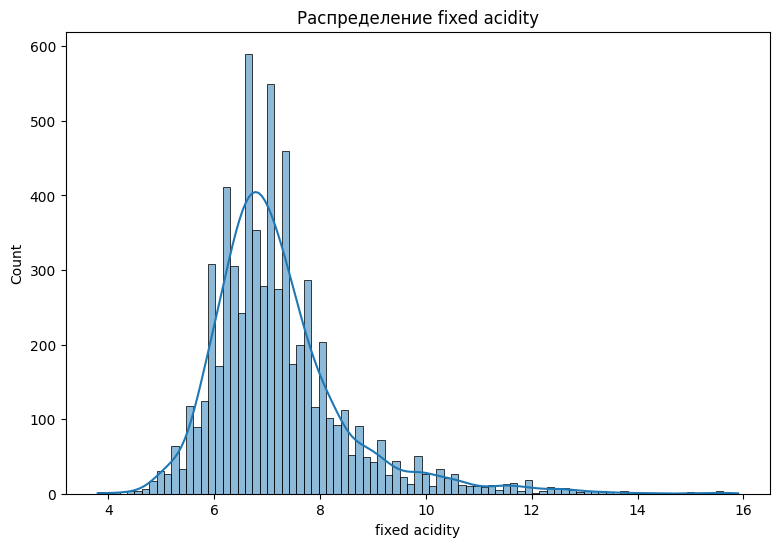

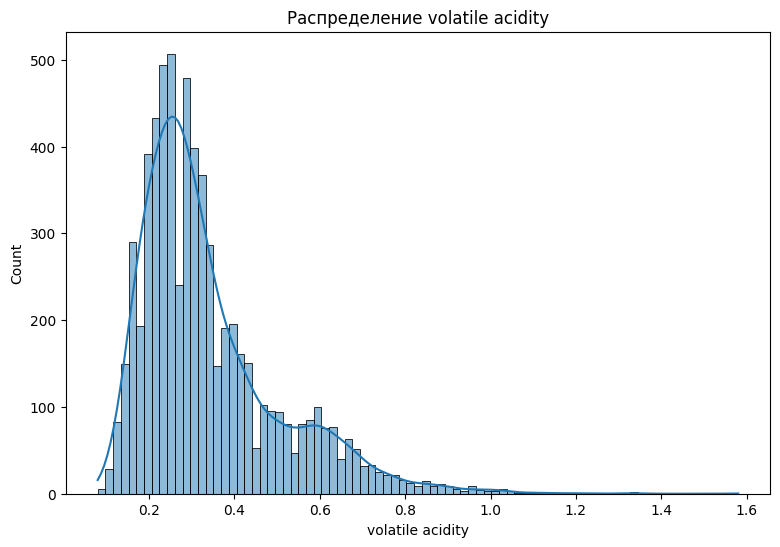

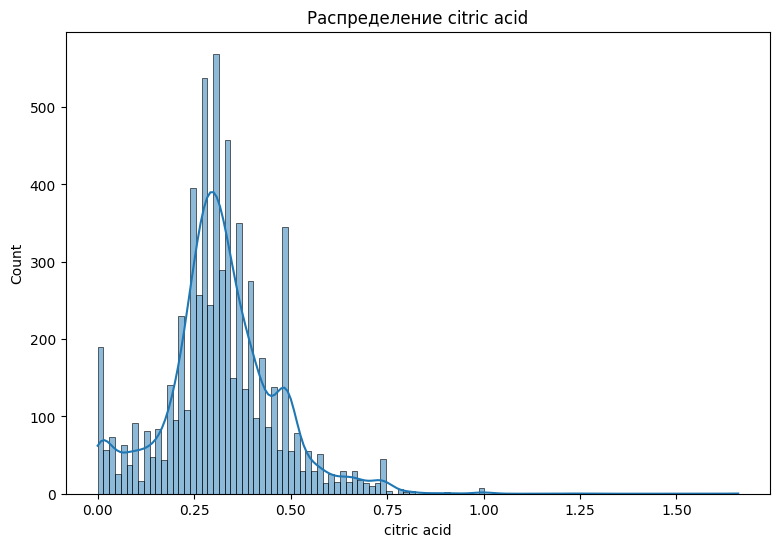

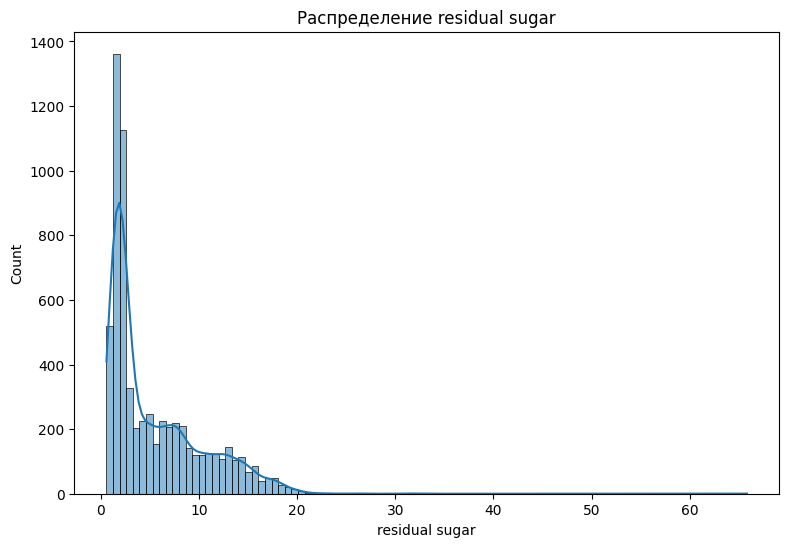

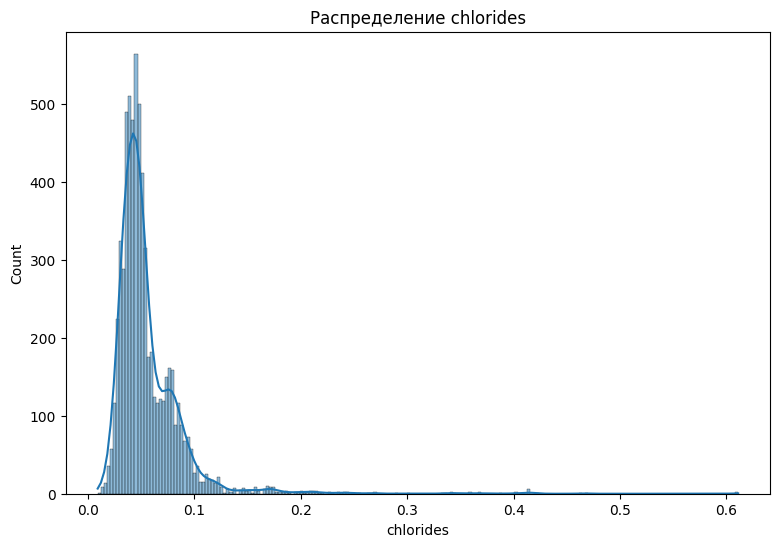

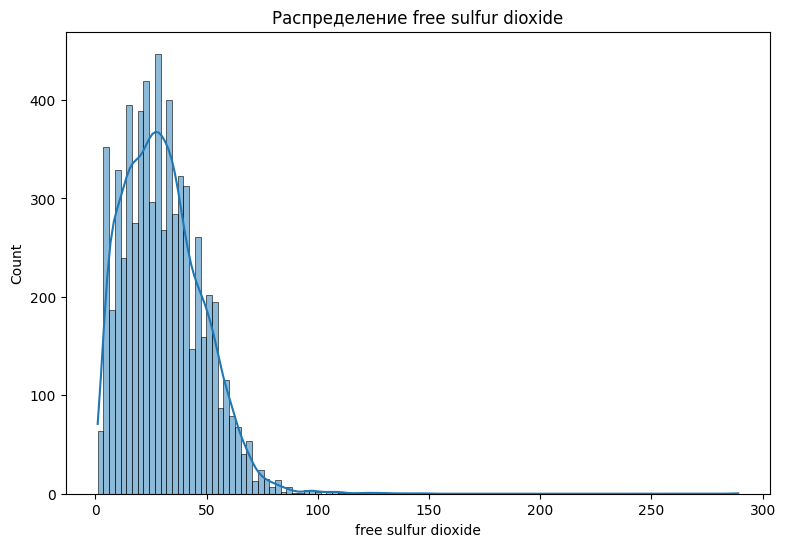

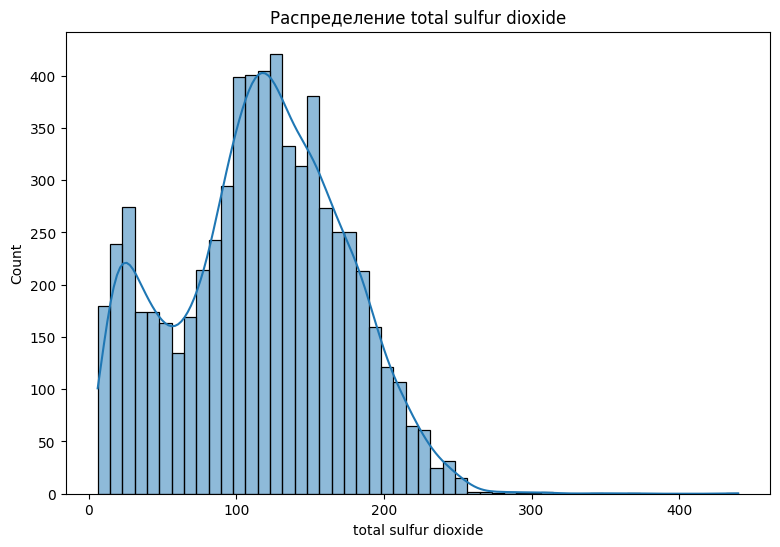

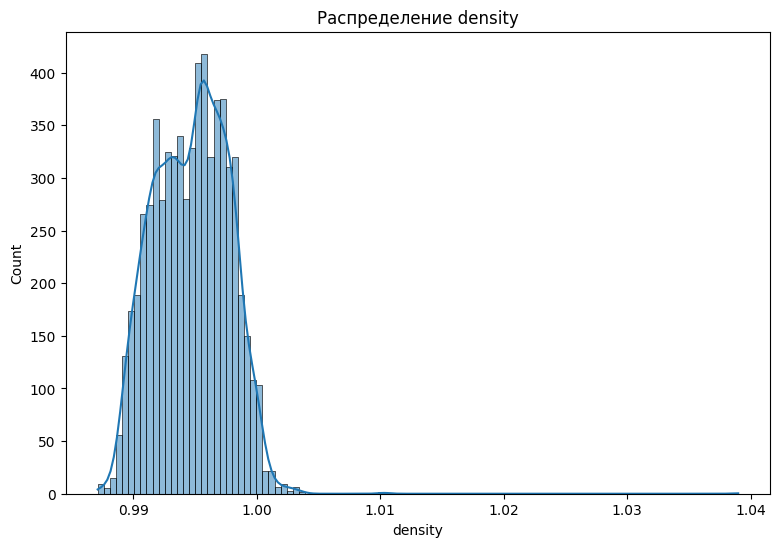

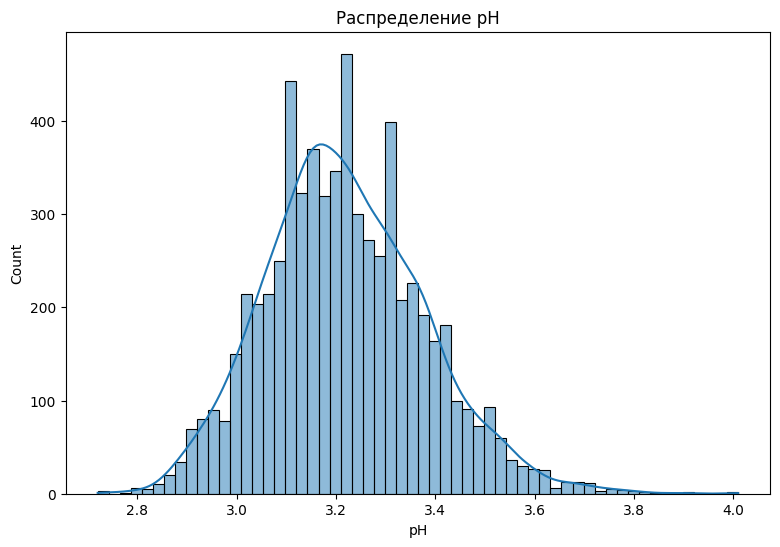

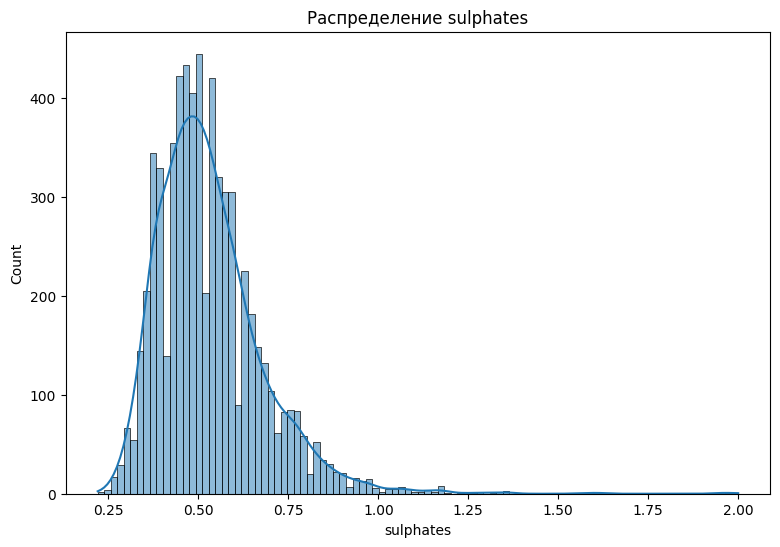

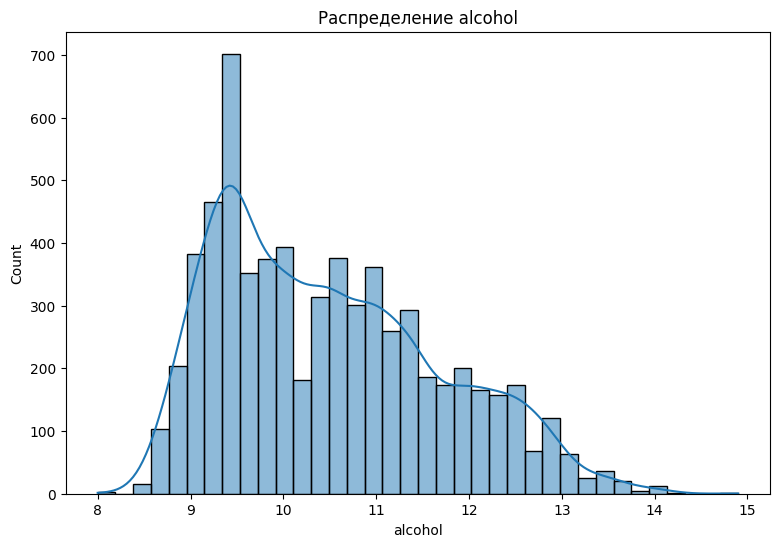

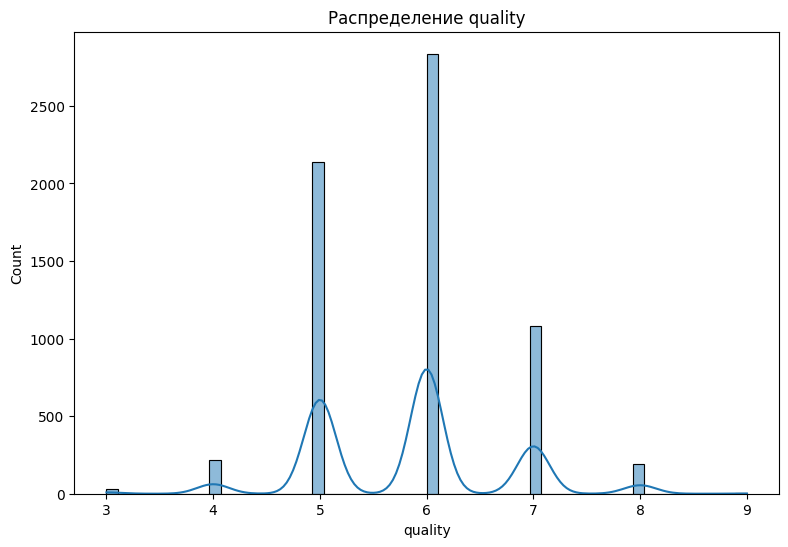

In [4]:
for column in columns:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Распределение {column}')

Определим есть ли выбросы(отмечены кружками):

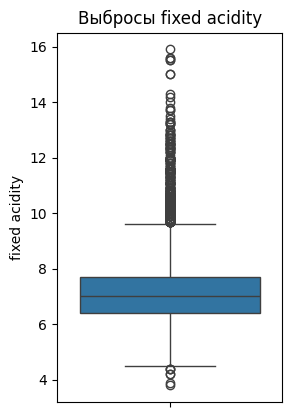

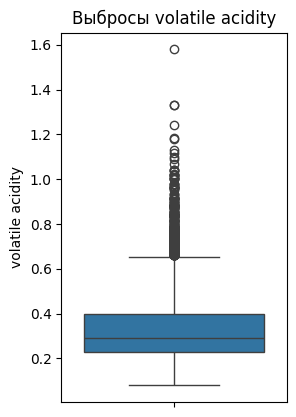

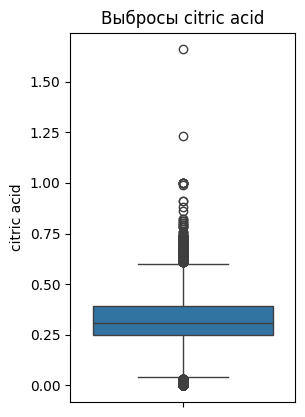

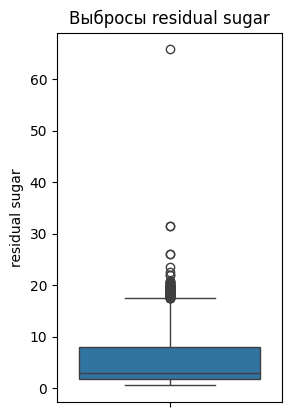

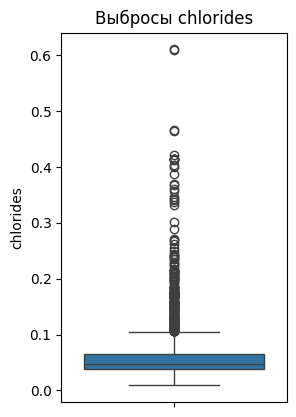

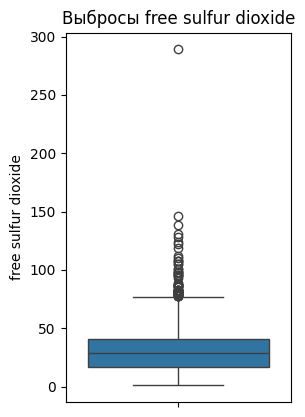

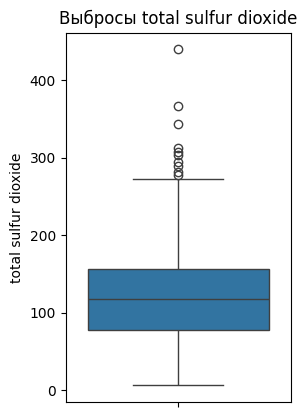

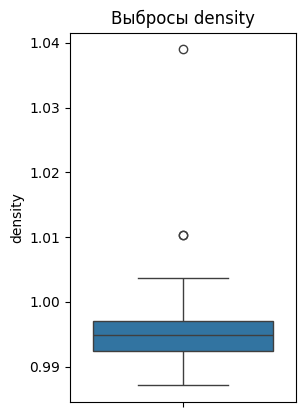

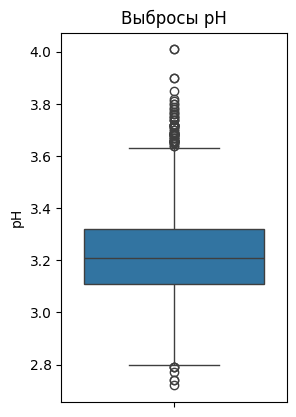

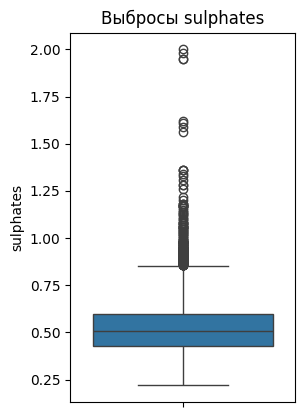

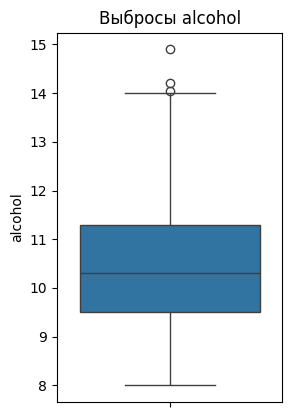

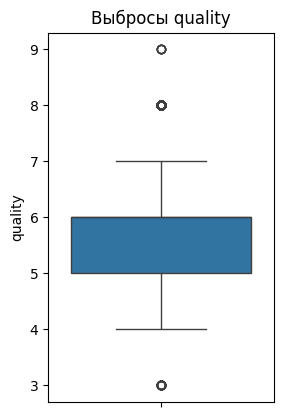

In [5]:
for column in columns:
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Выбросы {column}')
    plt.show()

In [6]:
numeric_df = df.select_dtypes(include=[np.number])

# Считаем матрицу корреляций (метод Пирсона)
correlation_matrix = numeric_df.corr()

print("=== МАТРИЦА КОРРЕЛЯЦИЙ ===")
print(correlation_matrix.round(2))

=== МАТРИЦА КОРРЕЛЯЦИЙ ===
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00              0.22         0.32   
volatile acidity               0.22              1.00        -0.38   
citric acid                    0.32             -0.38         1.00   
residual sugar                -0.11             -0.20         0.14   
chlorides                      0.30              0.38         0.04   
free sulfur dioxide           -0.28             -0.35         0.13   
total sulfur dioxide          -0.33             -0.41         0.20   
density                        0.46              0.27         0.10   
pH                            -0.25              0.26        -0.33   
sulphates                      0.30              0.23         0.06   
alcohol                       -0.10             -0.04        -0.01   
quality                       -0.08             -0.27         0.09   

                      residual sugar  chlorides  free sulfur d

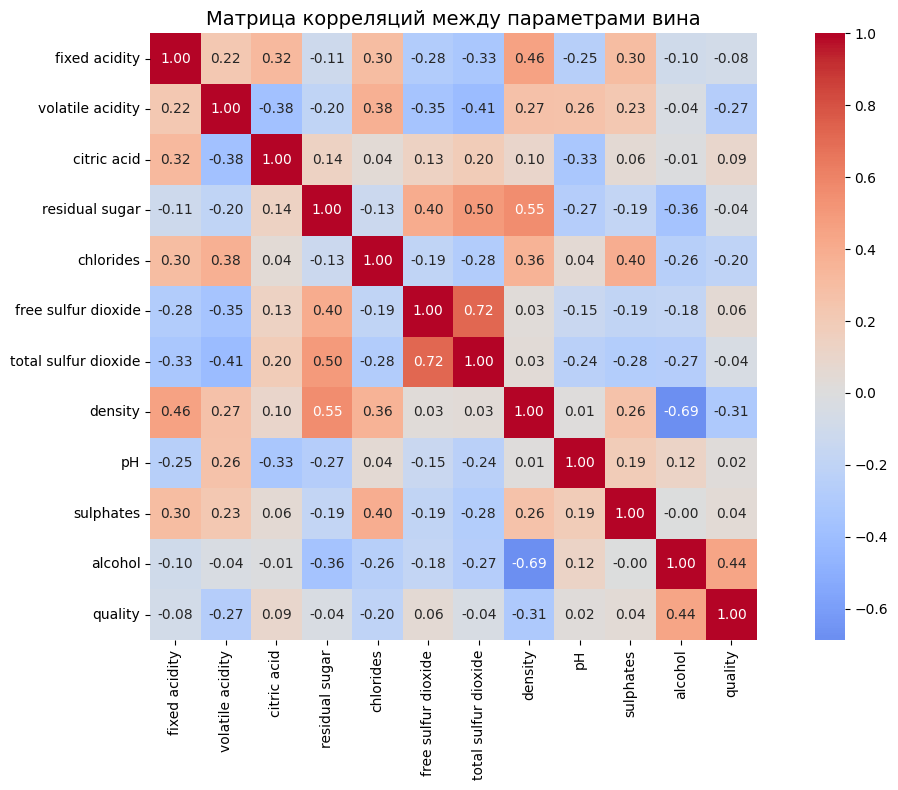

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,        # Показать числа в ячейках
            cmap='coolwarm',   # Цветовая схема
            center=0,          # Центр цветовой шкалы
            square=True,       # Квадратные ячейки
            fmt='.2f')         # Формат чисел

plt.title('Матрица корреляций между параметрами вина', fontsize=14)
plt.tight_layout()
plt.show()

In [21]:
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.5:
            high_corr_pairs.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j], 
                'correlation': corr_value
            })

print("=== ВЫСОКОКОРРЕЛИРОВАННЫЕ ПАРЫ (|r| >= 0.5) ===")
for pair in sorted(high_corr_pairs, key=lambda x: abs(x['correlation']), reverse=True):
    print(f"{pair['var1']:25} ↔ {pair['var2']:25}: {pair['correlation']:.3f}")

=== ВЫСОКОКОРРЕЛИРОВАННЫЕ ПАРЫ (|r| >= 0.5) ===
free sulfur dioxide       ↔ total sulfur dioxide     : 0.721
density                   ↔ alcohol                  : -0.687
residual sugar            ↔ density                  : 0.553


Анализ высококоррелированных пар:

free sulfur dioxide ↔ total sulfur dioxide: 0.721
Характер корреляции: сильная положительная
Объяснение: Прямая математическая зависимость. Общий диоксид серы включает в себя свободный диоксид серы

density ↔ alcohol: -0.687
Характер корреляции: сильная отрицательная
Объяснение: Физическое свойство. Алкоголь менее плотный чем вода, следовательно добавление большего количества алкоголя уменьшает плотность

residual sugar ↔ density: 0.553
Характер корреляции: средняя положительная
Объяснение: Физическое свойство. Сахар увеличивает плотность вина

In [22]:
weak_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < 0.1 and correlation_matrix.columns[i] != correlation_matrix.columns[j]:
            weak_corr_pairs.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j], 
                'correlation': corr_value
            })


weak_corr_pairs_sorted = sorted(weak_corr_pairs, key=lambda x: abs(x['correlation']))

print("=== ПАРЫ С ОЧЕНЬ СЛАБОЙ КОРРЕЛЯЦИЕЙ (|r| < 0.1) ===")
for pair in weak_corr_pairs_sorted[:15]:
    print(f"{pair['var1']:25} ↔ {pair['var2']:25}: {pair['correlation']:7.3f}")

=== ПАРЫ С ОЧЕНЬ СЛАБОЙ КОРРЕЛЯЦИЕЙ (|r| < 0.1) ===
sulphates                 ↔ alcohol                  :  -0.003
citric acid               ↔ alcohol                  :  -0.010
density                   ↔ pH                       :   0.012
pH                        ↔ quality                  :   0.019
free sulfur dioxide       ↔ density                  :   0.026
total sulfur dioxide      ↔ density                  :   0.032
residual sugar            ↔ quality                  :  -0.037
volatile acidity          ↔ alcohol                  :  -0.038
sulphates                 ↔ quality                  :   0.039
citric acid               ↔ chlorides                :   0.039
total sulfur dioxide      ↔ quality                  :  -0.041
chlorides                 ↔ pH                       :   0.045
free sulfur dioxide       ↔ quality                  :   0.055
citric acid               ↔ sulphates                :   0.058
fixed acidity             ↔ quality                  :  -0.077


Эти пары измеряют разные аспекты вина и не дублируют информацию друг о друге. Это независимые характеристики.

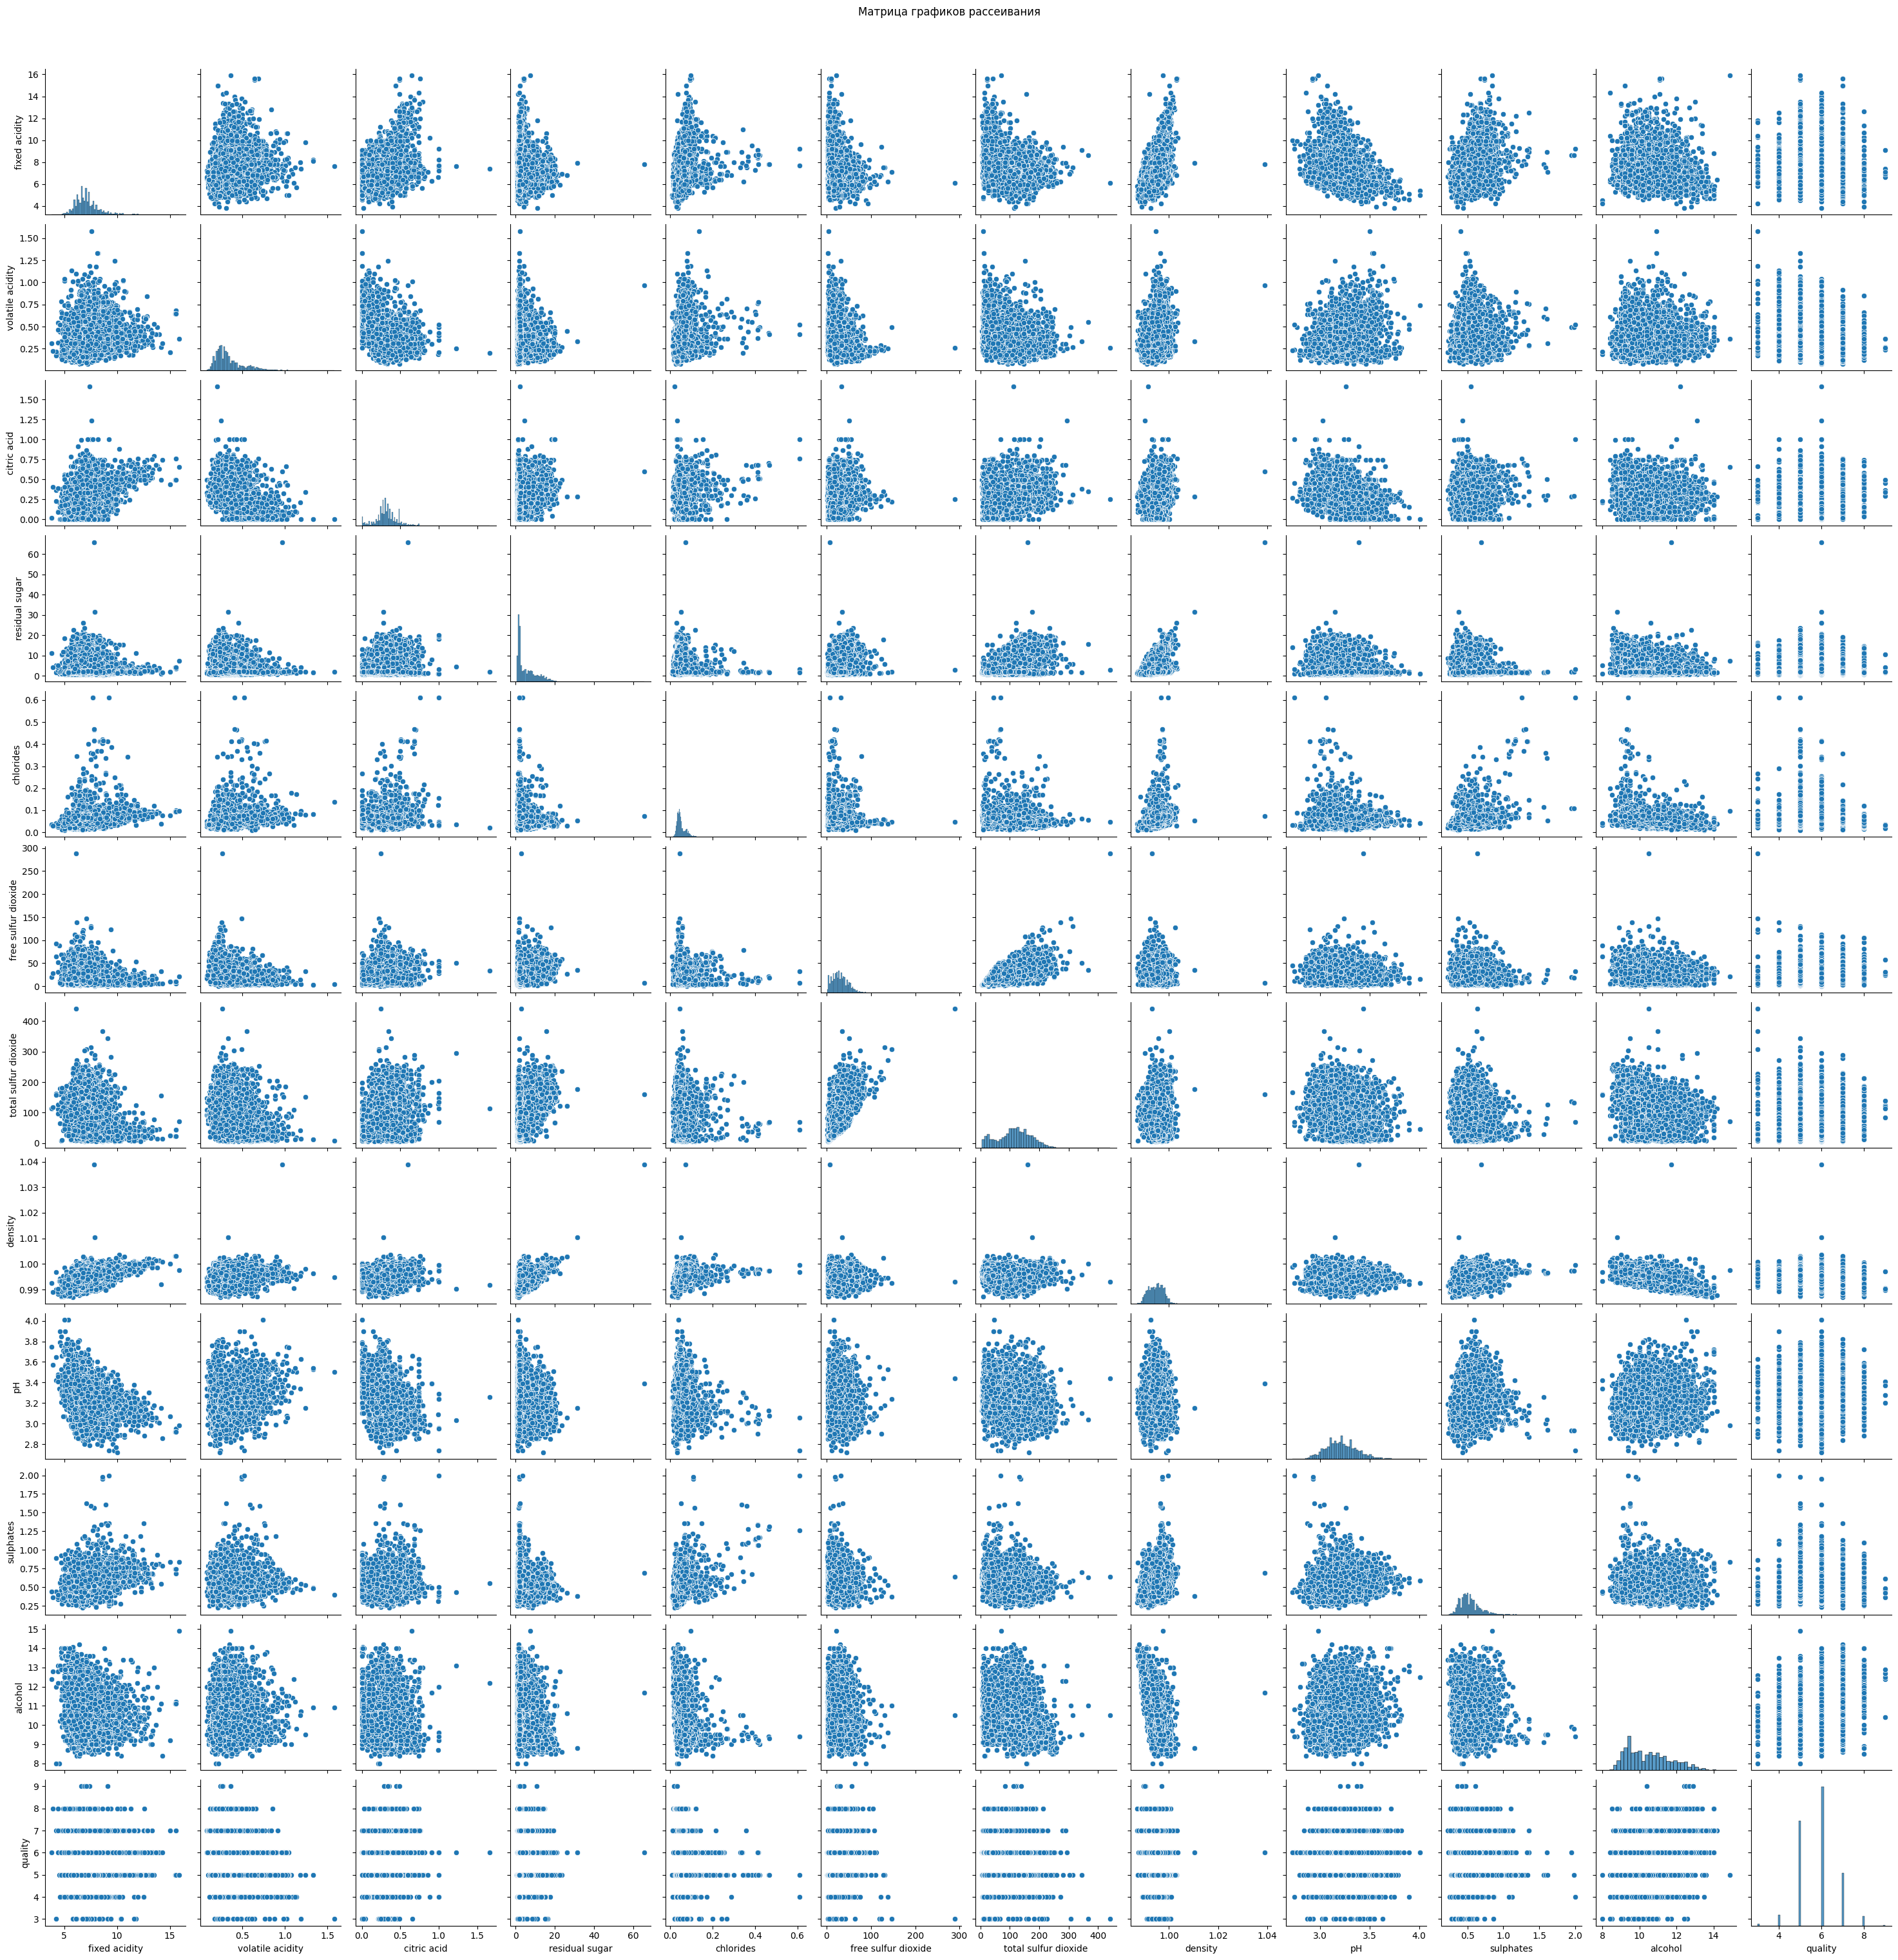

In [11]:
key_columns = ['alcohol', 'density', 'residual sugar', 'pH', 'quality']

sns.pairplot(df[columns], diag_kind='hist', corner=False)
plt.suptitle('Матрица графиков рассеивания', y=1.02)
plt.show()